# Parv's Automobile Performance Analysis

- In this Machine Learning Project, I will be conducting a thorough analysis to predict vehicle fuel efficiency (mpg).
- Libraries used: Pandas, Numpy, Scikit-learn, Matplotlib, Seaborn
- Skills overview: Data Cleaning, Data Preprocessing, Data Visualization, Principle Component Analysis, Linear Regression.
- Dataset used: [UCI Auto MPG Dataset](https://archive.ics.uci.edu/dataset/9/auto+mpg)
- Language used: Python

In [1]:
# All import statements for this project will be listed here
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

- `pandas`: Pandas is well know for being used in data manipulation and analysis.

- `numpy`: Numpy just makes mathematics computations so easy and efficient.

- `scikit-learn`: This is going to be providing all the Machine Learning algorithms and tools that I will be using in this project.

- `matplotlib` & `seaborn`: These are used for visualization to understand what is going on. As a visual learner, these libraries are fanstatic.

<br>

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
df = pd.read_csv(url, names=column_names, sep='\\s+')

df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

- Nothing fancy here. I get the database URL and read the first few rows of the dataset. The dataset provided me with a file that displayed all the attribute titles.
- The only piece of code that I want to highlight is line 3, specifically `sep='\\s+'`, as I noticed the columns in the database were separated by spaces, which led me to use this code.
- As you can see, we have a bunch of attributes to work with. I will be using these attributes to help predict the fuel efficiency.

<br>

In [3]:
df.drop(columns=["car name"], inplace=True)

- Here I drop the column names "car name" because there isn't really a use for strings in numerical anaylsis.
- By default, `inplace` is set to False. This means that changing database will create a seperate database with the new information.
- In this code we have to set `inplace=True` because it replaces the old database (with "car name") with new databased (without "car name"). 

<br>

In [4]:
  df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
  df.dropna(inplace=True)

- So I went through the database and noticed that some rows in the horsepower column have no values (represented by "?")
- So to avoid any issues, I replaced "?" with NaN via `errors="coerce"`

<br>

In [5]:
selected_features = ["weight", "displacement", "cylinders", "horsepower"]
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[selected_features])
df_pca = pd.DataFrame(pca_features, columns=["PC1", "PC2"])

- Since there are mulitple features, I will be performing dimensional reduction using PCA to make calculations and analysis easier for me.
- In the code above, I made 2 PCA components (PC1 and PC2) as this will set the stage for linear regression.
- Now I will be comducting analysis on the relation between PC1 and PC2.

<br>

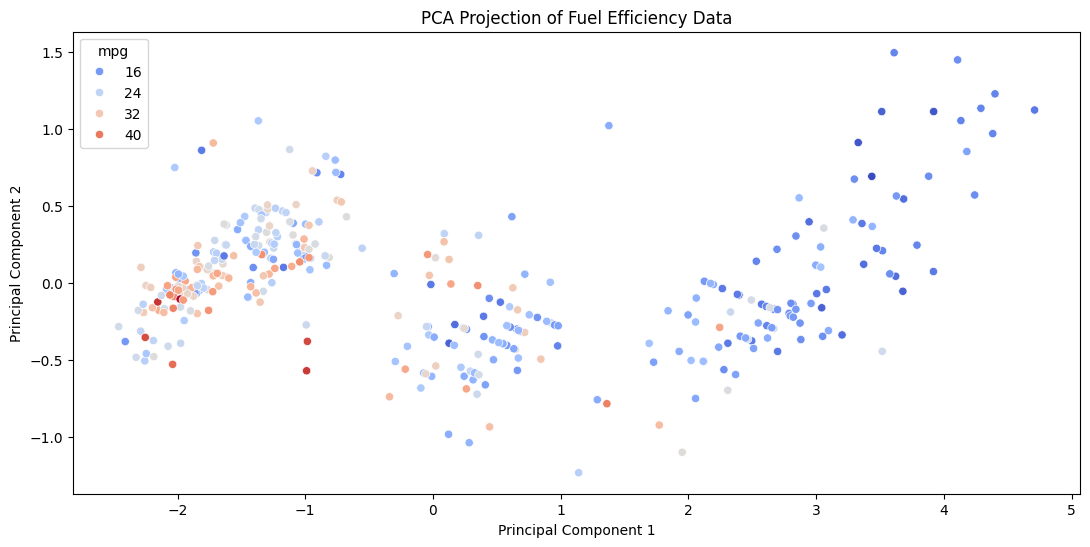

In [6]:
plt.figure(figsize=(13,6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df["mpg"], palette="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Fuel Efficiency Data")
plt.show()

### Key Observations
- There are 3 distinct clusters. Probably corresponding to low, medium and high fuel efficiency.
- Since the color scheme represents fuel efficiency, the leftmost cluster (around PC1 ≈ -3) is more reddish, indicating lower fuel efficiency (high-displacement, heavy cars, possibly older models). The rightmost cluster (around PC1 ≈ +3 to +5) is mostly blue, suggesting higher fuel efficiency (lighter, smaller engines, possibly newer models).
- Next I am going to graph the scree plot to check how much each principle component contributes to the total variance.


<br>

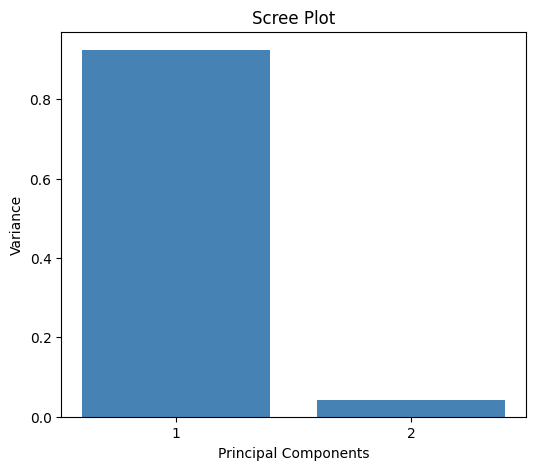

In [7]:
plt.figure(figsize=(6,5))
plt.bar([1, 2], pca.explained_variance_ratio_, color='steelblue')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.title('Scree Plot')
plt.xticks([1, 2])
plt.show()

### Key Observations
- Since PC1 captures over 90% of the variance, it most likely contains almost all the important features required to interpret the database.
- Since PC2 barely captures on 10% of the variance, it most likely does not provide much additional information.
- Next I am going to analyze the PCA Loadings Plot to find out which features contribute the most to PC1 and PC2.
- To find out what makes PC1 so strong in terms of variance, I will be plotting the PCA loadings graph

<br>

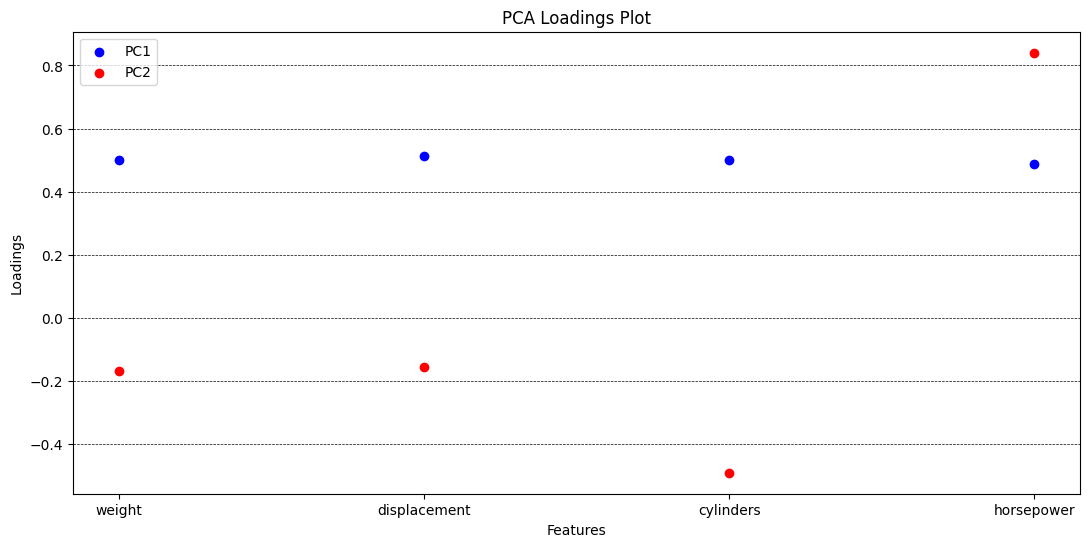

array([[ 0.50028586,  0.51202868,  0.49990207,  0.4874819 ],
       [-0.1692373 , -0.15579685, -0.49063157,  0.84045627]])

In [8]:
plt.figure(figsize=(13,6))
components_df = pd.DataFrame(pca.components_, columns=selected_features, index=[1, 2])
plt.scatter(components_df.columns, components_df.loc[1], label="PC1", color='blue')
plt.scatter(components_df.columns, components_df.loc[2], label="PC2", color='red')
plt.axhline(-0.4, color='black', linewidth=0.5, linestyle='--')
plt.axhline(-0.2, color='black', linewidth=0.5, linestyle='--')
plt.axhline(0.0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(0.2, color='black', linewidth=0.5, linestyle='--')
plt.axhline(0.4, color='black', linewidth=0.5, linestyle='--')
plt.axhline(0.6, color='black', linewidth=0.5, linestyle='--')
plt.axhline(0.8, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.xlabel("Features")
plt.ylabel("Loadings")
plt.title("PCA Loadings Plot")
plt.show()

pca.components_ # Actual contribution of each feature. array[0] is PC1 and array[1] is PC2

### Key Observations
- This graph displays that PC1 represents weight, displacement and horsepower since their contributions are relatively high and positive. We also notice that PC1 has a heavily negatively correlates with MPG. Intuitively this makes sense because higher weight, displacement, and horsepower typically lower fuel efficiency.
- On the contrary, PC2 strongly captures MPG. Cylinders on the other hand are slightly tricky to interpret because they show moderate contributions to both principle components. I am guessing the reason why cylinders are slightly higher in PC1 is because more cylinders often mean higher displacement (PC1) and lower efficiency (PC2).
- So to summarize, PC1 represents **vehicle size** and **engine power** whereas PC2 represents **fuel economy**. 

<br>

## Analysis Conclusion

- **Feature Relationships** – Weight, displacement, and horsepower are strongly correlated, while MPG is inversely related to them.

- **PCA Insights** – The first principal component (PC1) captures about 90% of the variance, dominated by vehicle size and power-related features.

- **Clear Trends** – Heavier and more powerful cars tend to have lower fuel efficiency, a crucial insight for predictive modeling.

- **Next Steps** – We will now apply linear regression to quantify these relationships and build a predictive model for fuel efficiency.



<br>

In [9]:
X = df_pca
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- Here I am using the 80/20 split where I use 80 percent of the data to train and 20 percent to test. Chose a random value for state to ensure reproducibility.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 18.54866574365201
R² Score: 0.7015755484884221


- In the mode segment above, I am setting up the linear regression model and calculating the mean squared error and R² to figure out how good of a model we have.
- We notice that the MSE is extremely low and R² is extremely close to 1, suggesting that linear regression performed exxceptionally well.
- Let's look at the graph

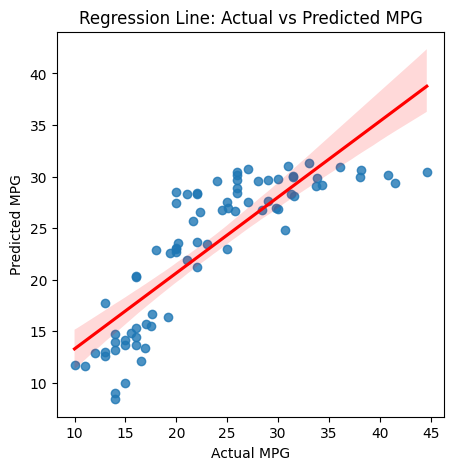

In [11]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"red"})
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Regression Line: Actual vs Predicted MPG")
plt.show()

# Interpretation and Conclusion

With a dataset of approximately 400 records and multiple vehicle features, achieving an R² value of about 0.70 indicates a relatively strong predictive model for fuel efficiency. While not perfect, this level of accuracy suggests that the selected features capture a significant portion of the variability in mpg. Additionally, PCA and data visualization provided some very valuable insights into the relationships between the varuious features, making the analysis both interpretable and informative. The patterns observed here reinforce the impact of factors like weight, horsepower, and displacement on fuel economy. Overall, this study demonstrates how statistical techniques can uncover some meaningful trends in automotive performance.